<a href="https://colab.research.google.com/github/RFajardoMonzon/MachineLearningCourse/blob/master/Intro_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 8 - Introducción a Tensorflow.


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. Operaciones con escalares, matrices y tensores.

Tensorflow implementa tipos de datos y funciones muy similares a los que hemos utilizado previamente con la librería Numpy. Sin embargo, ahora tendremos que hacer uso de las funciones dadas por Tensorflow si queremos que estas formen parte de tu grafo de operaciones. Entre los tipos de datos incluidos en la librería será común trabajar con valores escalares, vectores, matrices y tensores. Para ir tomando soltura trabajando con estos tipos de datos y también con el flujo de trabajo de Tensorflow, vamos a realizar algunas operaciones matemáticas.

---

**Tu tarea:** 

1. Investiga la creación y operaciones con matrices para calcular las siguiente expresiones. Recuerda que todas las operaciones deberán de incluirse en el grafo de operaciones y ser evaluadas para obtener el resultado. 

> > a)  $ 5 * (-10) + 8 = -42 $



> >b)  $\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

>> c)  $\begin{bmatrix}
 1. \\
 3. \\
 5. \\
\end{bmatrix}\begin{bmatrix}
 2. & 4. & 6. \\
\end{bmatrix} = \begin{bmatrix}
 2. & 4. & 6. \\
 6. & 12. & 18. \\
 10. & 20. & 30. \\
\end{bmatrix} $ 

> > d) Crea un *placeholder* de un Tensor con unas dimensiones que nos sirvan para almacenar un número indefinido de imágenes (busca cómo establecer una dimensión de tamaño indefinido), de ancho 28 píxeles, largo 28 píxeles y con 3 canales de color.


2. (**bonus**) Investiga buscando en la documentación de Tensorflow cómo podemos integrar Google Colab con **Tensorboard** para visualizar el grafo de operaciones de una manera cuqui.

In [0]:
import tensorflow as tf

# Reseteamos el grafo de operaciones.
tf.reset_default_graph()

# Utilizamos Sesiones interactivas para
# ahorrarnos especificar que sesión vamos
# a utilizar.
sess = tf.InteractiveSession()

a = tf.constant(5) * tf.constant(-10) + tf.constant(8)

b = tf.constant(1.0, shape=[2, 3]) + tf.constant([1., 2., 3., 4., 5., 6.],
                                                 shape=[2, 3])

c = tf.constant([1., 3., 5.], shape=[3, 1]) * tf.constant([2., 4., 6.],
                                                          shape=[1, 3])

d = tf.placeholder("uint8", shape=(None, 28, 28, 3))

print(a.eval())
print(b.eval())
print(c.eval())

-42
[[2. 3. 4.]
 [5. 6. 7.]]
[[ 2.  4.  6.]
 [ 6. 12. 18.]
 [10. 20. 30.]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


## 2. Regresión Lineal con Tensorflow.

Tensorflow implementa muchas funciones diferentes e incluso otro tipo de modelos de ML que ya hemos visto previamente en el curso. Sin embargo, para ir cogiendo soltura e ir entendiendo la diferencia entre Variables, Constantes, Placeholder, etc. vamos a implementar de nuevo el Modelo de Regresión Lineal Simple. Recuerda, este modelo responde a la siguiente ecuación:

> > $ Y = w_0 + x_1 * w_1 $,

donde $Y$ y $X$ donde en este caso variables donde insertarás tus datos (Placeholders), y $w$ serán los parámetros que quieres entrenar. En este caso, definiremos toda la estructura del modelo correctamente con Tensorflow, y dejaremos este se encargue de la optimización (entrenamiento) de dicho modelo.

---

**Tu tarea:** 

1. Cargar desde Sklearn el Boston Housing dataset que ya utilizamos con antelación en otro ejercicio, y guarda como variable de entrada la columna Room Number (RM) y de salida el Valor Medio de la Vivienda (MEDV). Algo que no hicimos en su momento pero ya sabemos que procede antes del análisis es Estandirizar nuestras variable. Finalmente, para no perder las buenas costumbres, visualiza tus puntos con un *scatter plot.*

2. Una vez tengas esto hecho, vamos a comenzar a definir el modelo de ***Regresión Lineal Simple*** con Tensorflow. Primero créate dos *Placeholders* que utilizaremos para introducir tus datos de entrada y salida. Recuerda que tienes que definir correctamente las dimensiones de estos *Placeholders* (en caso de no supieras cuántos datos tienes podrías dejar estas dimensiones indefinidas). En Tensorflow puedes declarar tus parámetros con la función  ***tf.placeholder()***. Llama al tensor de valor de entrada ***_X*** y al tensor de salida ***_Y***.

3. Después procede a definir tus parámetros $w_0, w_1$, que como ya sabes serán las variables a optimizar (entrenar) de tu modelo. En Tensorflow puedes declarar tus parámetros con la función ***tf.Variable()***.

4. Una vez tengas tus variables y parámetros definidos, puedes establecer qué operaciones relacionan a tus variables de entrada, salida y parámetros (vamos, que definas las operaciones que conforman el modelo de regresión).

5. Con el tensor obtenido en el punto 4, ya tendrás la estructura que define las predicciones de tu modelo. Ahora, implementa un tensor llamado **"error"** en el que se calcule el Error Cuadrático Medio entre tu tensor de valores predicho y valores reales.

6. Una vez tengas tu modelo construido (y por tanto guardado en tu grafo de operaciones), ya está todo listo para que Tensorflow ejecute su magia y te optimize automáticamente el modelo. Normalmente tendrías que declarar tu optimizador (*Descenso del Gradiente*, mañana lo vemos) y llamar a la función ***sess.run(...)*** a la que deberás de definir con el atributo *** feed_dict=*** cuáles son tus datos de entrada y de salida del modelo. Mañana veremos esto en profunidad, así que de momento hoy este código está ya implementado. Únicamente preocúpate de que tu último *tensor* se llame "**error**" y que los placeholders de entrada y salida se llamen ***_X*** e ***_Y***. Entiende qué realiza el código.

7. Comprueba que los valores obtenidos son correctos visualizando la recta de regresión.




In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

boston_dataset = load_boston()

# print(boston_dataset.DESCR)

X = boston_dataset.data
Y = boston_dataset.target

n, p = X.shape

ROOM = X[:, 5:6]
# scaler.fit(ROOM)
# ROOM = scaler.transform(ROOM)
MEDV = Y.reshape(Y.shape[0], 1)

## COMIENZA TU CÓDIGO AQUÍ ##
print(ROOM.shape, MEDV.shape)

(506, 1) (506, 1)


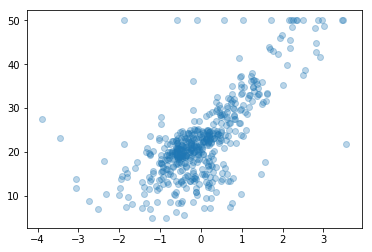

In [0]:
plt.scatter(ROOM, MEDV, alpha=0.3)
plt.show()

-6.083879876036127 4.608128385803568


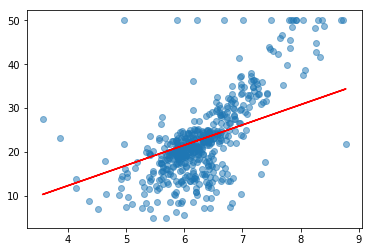

In [0]:
### COMIENZA TU CÓDIGO AQUÍ ###

_X = tf.placeholder(shape=(None, 1), dtype='float64')
_Y = tf.placeholder(shape=(None, 1), dtype='float64')
_W0 = tf.Variable(1, dtype='float64')
_W1 = tf.Variable(-1, dtype='float64')
Yp = _X * _W1 + _W0
error = tf.reduce_mean(tf.squared_difference(Yp, _Y))

### ACABA TU CÓDIGO AQUÍ ###

# Valor del ratio de aprendizaje.
learning_rate = 0.02
# Función utilizada para inicializar todas las variables no inicializadas.
init = tf.global_variables_initializer()
# Definimos el optimizador a utilizar para minimizar el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)
# Número de iteraciones a cumplir.
epochs = 500

with tf.Session() as sess:
    
    # Ejecutamos el tensor para inicializar variables.
    sess.run(init)

    # Minimizamos el coste repetidamente.
    for i in list(range(epochs)):

      _, W0, W1 = sess.run([optimizer, _W0, _W1], feed_dict={_X : ROOM, 
                                                             _Y : MEDV})
      
      
print(W0, W1)

plt.scatter(ROOM, MEDV, alpha=0.5)
plt.plot(ROOM, W0 + W1 * ROOM, c="red")
plt.show()
        

-0.841474181163138 3.7839956332126605


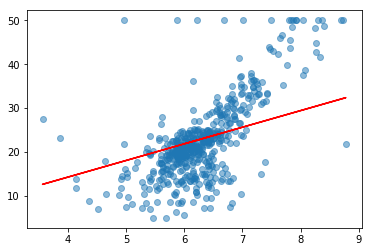

In [0]:
print(W0, W1)

plt.scatter(ROOM, MEDV, alpha=0.5)
plt.plot(ROOM, W0 + W1 * ROOM, c="red")
plt.show()